# Práctica Bloque 2 - IA

Autores: Sergi Mayol Matos, Alejandro Rodríguez Arguimbau <br>
Correos: sergi.mayol1@estudiant.uib.cat, alejandro.rodriguez7@estudiant.uib.cat <br>
Fecha: 06/12/2022

## Prerrequisitos

Para los siguientes apartados ([parte 1](#parte-1-preparación-de-los-datos) y [parte 2]()) se emplearán las siguientes librerías:

* [numpy](https://numpy.org/)
* [pandas](https://pandas.pydata.org/)
* [matplotlib](https://matplotlib.org/)
* [sklearn](https://scikit-learn.org/stable/)

> Nota: Para ver más información sobre las librerías, mirar el fichero [Pipfile](./Pipfile).

### Instalación de librerías

Para instalar las librerías, se debe ejecutar el siguiente comando:

```bash
pipenv install -d
```

> Nota: Se necesita tener instalado [pipenv](https://pypi.org/project/pipenv/).

### Importación de librerías

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Parte 1: Preparación de los datos

En la primera parte de la práctica se analizarán los datos de entrada y se prepararán para la [parte 2](#Parte-2:-Entrenamiento-del-modelo).

### Carga de datos

In [2]:
df = pd.read_csv("./datos/dades.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Análisis de datos

En esta sección se analizarán los datos de entrada para ver si hay que eliminar o modificar algún dato.

Para analizar los datos, comprobaremos la cantidad de datos que faltan en cada columna.

In [3]:
def check_is_nan(df: pd.DataFrame):
    results = []
    col_names = []
    for col in df.columns:
        col_names.append(col)
        results.append(df[col].isna().sum())

    return {"col_names": col_names, "results": results, "percent": [x/len(df) for x in results]}


results = check_is_nan(df)

for i in range(len(results["col_names"])):
    print(
        f"{results['col_names'][i]}: {results['results'][i]} ({results['percent'][i]})")

PassengerId: 0 (0.0)
Survived: 0 (0.0)
Pclass: 0 (0.0)
Name: 0 (0.0)
Sex: 0 (0.0)
Age: 177 (0.19865319865319866)
SibSp: 0 (0.0)
Parch: 0 (0.0)
Ticket: 0 (0.0)
Fare: 0 (0.0)
Cabin: 687 (0.7710437710437711)
Embarked: 2 (0.002244668911335578)


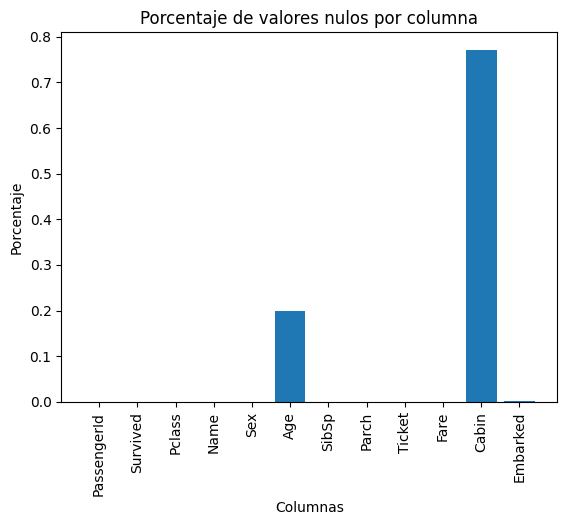

In [4]:
plt.bar(results["col_names"], results["percent"])
plt.title("Porcentaje de valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)
plt.show()

Se puede observar que hay 3 columnas con datos faltantes:

* `Age`
* `Cabin`
* `Embarked`

Aunque de las 3 columnas, la columna con más datos faltantes, con diferencia, es `Cabin`, casi un 80%. Por ello, se eliminará esta columna.

Por lo que los datos que quedan, de momento, son:

In [5]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Para las columnas `Age` y `Embarked`, se rellenarán los datos faltantes con la media y la moda, respectivamente. Se realizará la media de `Age`, ya que faltan aproximadamente un **20%** de los datos, y la moda de `Embarked`, ya que faltan muy pocos datos y no son datos numéricos.

In [6]:
media_edad = df["Age"].mean()
df["Age"].fillna(media_edad, inplace=True)

moda_embarque = df["Embarked"].mode()[0]
df["Embarked"].fillna(moda_embarque, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


En este caso las columnas `Name` y `Ticket` no las vamos a utilizar y por eso las eliminamos del conjunto de datos.

In [7]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Convertimos la columna `Sex` en 0 y 1:
* Hombres: 0
* Mujeres: 1

In [8]:
df['Sex']=df['Sex'].replace('male', 0)
df['Sex']=df['Sex'].replace('female', 1)
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


Se realiza la matriz de correlación

In [12]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000
